In [39]:
import pandas as pd
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import cross_val_score
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

In [40]:
myiris = pd.read_excel('Iris.xlsx')

In [3]:
myiris.head(4)

,sepal_len,sepal_wid,petal_len,petal_wid,class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0


In [5]:
X = myiris.iloc[:,:-1]
y = myiris.iloc[:,-1]

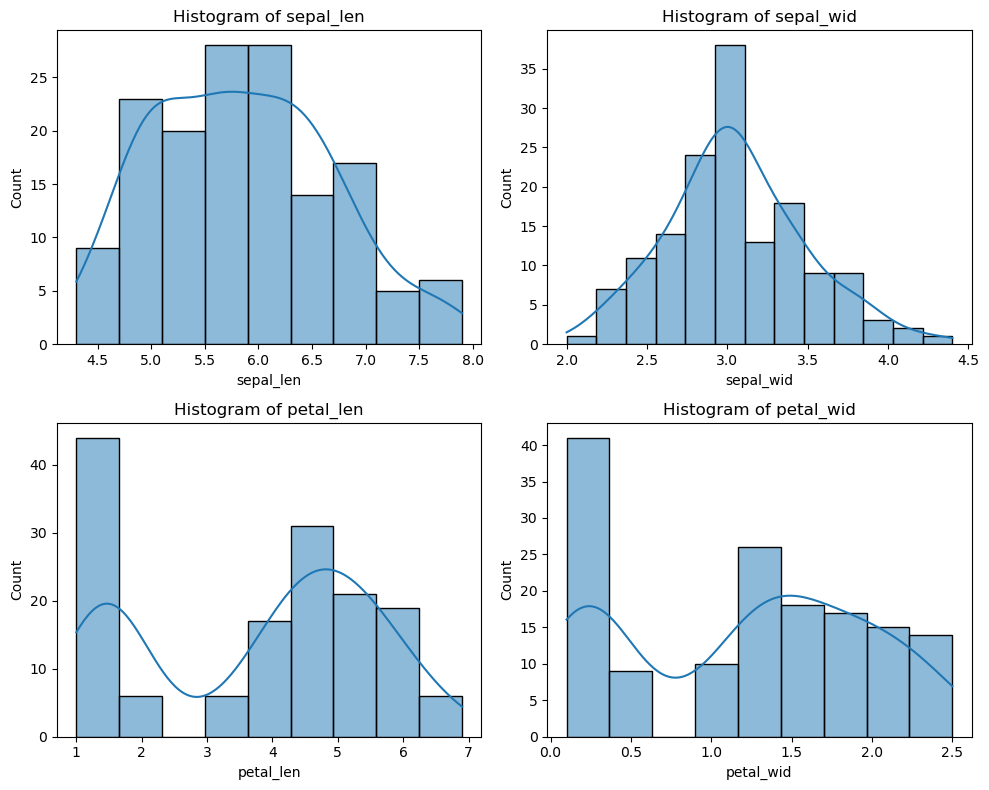

In [17]:
# Plot histogram for each feature
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

for i, column in enumerate(X.columns):
    sns.histplot(X[column], ax=axes[i//2, i%2], kde=True)
    axes[i//2, i%2].set_title(f'Histogram of {column}')

plt.tight_layout()
plt.show()

In [15]:
# Function to perform normality tests and return results
def test_normality(feature):
    # Shapiro-Wilk Test
    shapiro_stat, shapiro_p = stats.shapiro(feature)
    
    # Kolmogorov-Smirnov Test
    ks_stat, ks_p = stats.kstest((feature - feature.mean()) / feature.std(), 'norm')
    
    # Check if either test indicates normality
    shapiro_normal = shapiro_p > 0.05
    ks_normal = ks_p > 0.05
    
    return shapiro_normal or ks_normal

# Perform normality tests for each feature
for column in X.columns:
    print(f"Normality tests for {column}:")
    normality = test_normality(X[column])
    if normality:
        print(f"{column} is normally distributed.")
    else:
        print(f"{column} is not normally distributed.")
    print("\n")


Normality tests for sepal_len:
sepal_len is normally distributed.


Normality tests for sepal_wid:
sepal_wid is normally distributed.


Normality tests for petal_len:
petal_len is not normally distributed.


Normality tests for petal_wid:
petal_wid is not normally distributed.




In [19]:
gnb = GaussianNB()

In [21]:
scores = cross_val_score(gnb, X, y, cv=10) 

In [26]:
pd.DataFrame(np.round(scores, 2), columns=["Cross-validation scores"])

,Cross-validation scores
0,0.93
1,0.93
2,1.00
3,0.93
4,0.93
5,0.93
6,0.87
7,1.00
8,1.00
9,1.00


In [27]:
print("Mean accuracy:", np.round(scores.mean(), 2))

Mean accuracy: 0.95


In [31]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [33]:
gnb = GaussianNB()
gnb.fit(X_train,y_train)


GaussianNB()

In [34]:
gnb.score(X_test, y_test)

1.0

In [36]:
y_pred = gnb.predict(X_test)

Text(50.722222222222214, 0.5, 'True Labels')

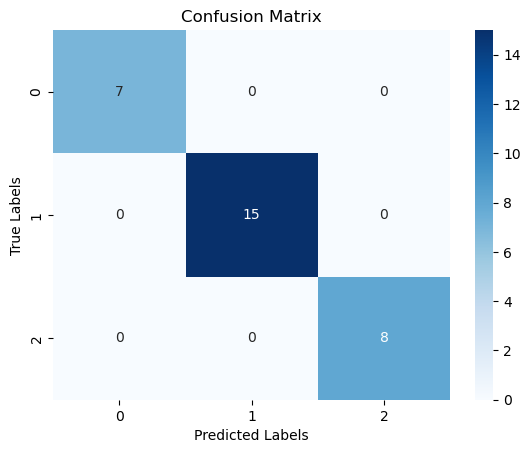

In [42]:
conf_matrix = confusion_matrix(y_test, y_pred)
ax = sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
ax.set_title('Confusion Matrix')
ax.set_xlabel('Predicted Labels')
ax.set_ylabel('True Labels')

In [46]:
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00        15
           2       1.00      1.00      1.00         8

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [ ]:
x_t